# Exercise 2: Plotting and Aggregation

## Aim: Use some of xarrays built-in methods to do some basic calculations with the data array.

### Issues Covered: 
- Creating a time-series using `.sel()` and `.isel()`
- Creating and customising plots using the inbuilt xarray `.plot()` function
- Doing arithmetic on data arrays
- Using `.mean()`, `.std()`, `.max()` and `.min()`
- Slicing an array with `.slice()`

## 1. Plotting

1. Import the `'../data/tas_rcp45_2055_mon_avg_change.nc'` dataset and create the temperature data array as in the last lesson.

In [16]:
import xarray as xr
ds = xr.open_dataset('../data/xbhubo.pgc0apr.nc')
temperature = ds["temp"]

2. Create a depth profile from `temperature` by using `sel` to select data for the same latitude and longitude values (31,0). There's a few ways to do this - can you think of them? Hint 1: The latitude value is `-50.625` and the longitude value is `0`. All 3 of these methods will return the same dataset. 

In [17]:
#print(temperature['lat'].values)
#print(temperature['lon'].values)

# Method 1
# temperature_cell = temperature.sel(lat=-89.5, lon=0.0)
# Method 2
# temperature_cell = temperature.sel(lat=temperature['lat'][0], lon=temperature['lon'][0])
# Method 3
#temperature_cell = temperature.isel(latitude=31, longitude=0, t=0)
temperature_cell = temperature.sel(latitude=-50.625, longitude=0)

3. Create a plot from this time series.

In [18]:
temperature_cell

<xarray.DataArray 'temp' (t: 1, depth: 20)> Size: 80B
[20 values with dtype=float32]
Coordinates:
    longitude  float32 4B 0.0
    latitude   float32 4B -50.62
  * depth      (depth) float32 80B 5.0 15.0 25.0 ... 4.577e+03 5.192e+03
  * t          (t) object 8B 1920-04-16 00:00:00
Attributes:
    source:     Unified Model Output:
    name:       temp
    title:      POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    date:       01/12/99
    time:       00:00
    long_name:  POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    units:      degC
    valid_min:  -1.7999878
    valid_max:  35.0495

4. Make the plot red with 'x' marking the points.

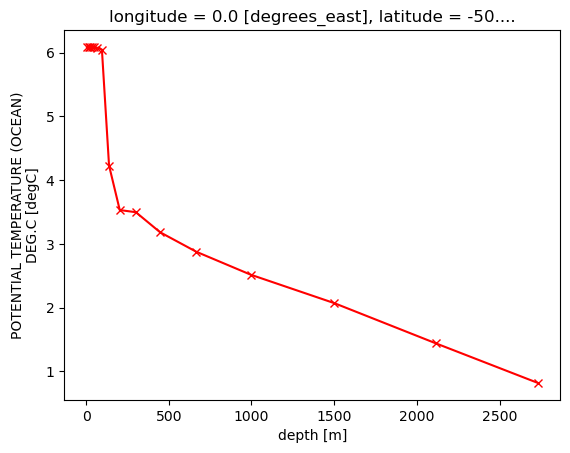

In [19]:
temperature_cell.plot(color='red', marker='x')

5. Create a time series plot comparing the temperature profile at three different grid cells:
 - lat = 0, lon = 0
 - lat = 10, lon = 10
 - lat = 20, lon = 20

Make sure each time series has a different colour and include a legend. Give them different linestyles too.
Hint: use `.isel` to index the lat and lon.
Hint: you will need to import matplotlib to add legend.

In [20]:
ds

<xarray.Dataset> Size: 13MB
Dimensions:      (longitude: 288, latitude: 144, depth: 20, t: 1,
                  longitude_1: 288, latitude_1: 143)
Coordinates:
  * longitude    (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude     (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
  * depth        (depth) float32 80B 5.0 15.0 25.0 ... 4.577e+03 5.192e+03
  * t            (t) object 8B 1920-04-16 00:00:00
  * longitude_1  (longitude_1) float32 1kB 0.625 1.875 3.125 ... 358.1 359.4
  * latitude_1   (latitude_1) float32 572B -88.75 -87.5 -86.25 ... 87.5 88.75
Data variables:
    temp         (t, depth, latitude, longitude) float32 3MB ...
    salinity     (t, depth, latitude, longitude) float32 3MB ...
    ucurr        (t, depth, latitude_1, longitude_1) float32 3MB ...
    vcurr        (t, depth, latitude_1, longitude_1) float32 3MB ...
Attributes:
    history:      Tue Sep 12 11:49:35 BST 2006 - CONVSH V1.91 16-February-2006
    Conventions:  CF-1.0

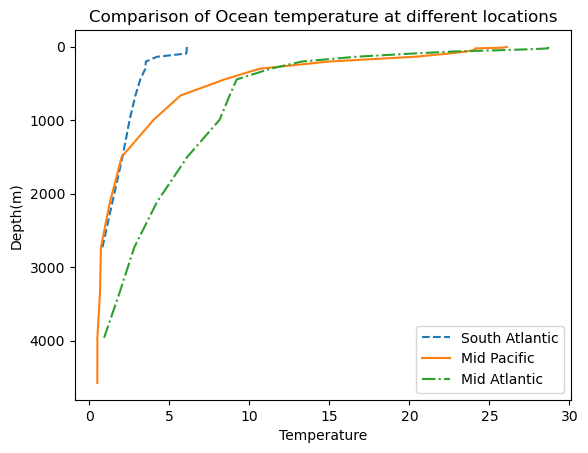

In [21]:
import matplotlib.pyplot as plt

# Make some axes to share between all the plots.
fig, ax = plt.subplots()

# Extract the time series for each location
temp_1 = temperature.sel(latitude=-50.625, longitude=0, )
temp_2 = temperature.sel(latitude=0, longitude=200, method='nearest')
temp_3 = temperature.sel(latitude=0, longitude=320, method='nearest')

# Plot the time series for each location
temp_1.plot(ax=ax, label="South Atlantic", linestyle='--', y='depth')
temp_2.plot(ax=ax, label="Mid Pacific", y='depth')
temp_3.plot(ax=ax, label="Mid Atlantic", linestyle='-.', y='depth')

plt.title('Comparison of Ocean temperature at different locations')
plt.ylabel('Depth(m)')
plt.xlabel('Temperature')
plt.legend()
# Oceanographers like depth to go downwards.
ax.invert_yaxis()
plt.show()

6. Let's plot some data in 2D. Use `sel` to select data for 5 meters below the surface. Label the axes and give the plot a title.

Text(0, 0.5, 'Latitude')

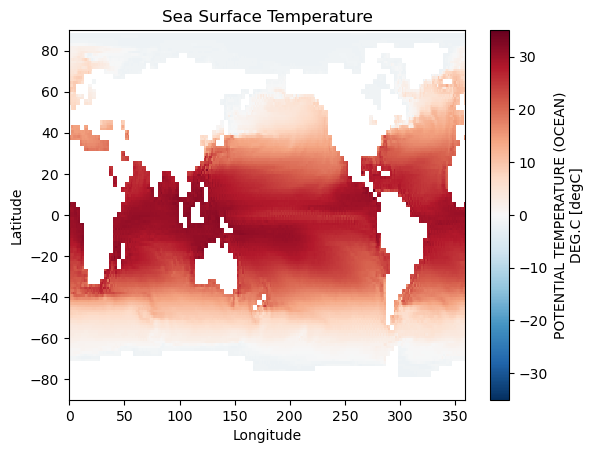

In [22]:
specific_time = temperature.sel(depth='5')
specific_time.plot()
plt.title('Sea Surface Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

## 2. Arithmetic and Aggregation

7. Let's compare the data between the sea surface and further down. Create two temperature datasets and extract the temperature change data the sea surface and the sea bottom

In [23]:
# smthn here
surface = temperature.isel(depth=0).squeeze()
bottom = temperature.isel(depth=-1).squeeze()
print(surface.shape)
print(bottom.shape)

(144, 288)
(144, 288)


8. Calculate the difference in temperature between july and january

In [24]:
delta_temp = bottom - surface
delta_temp

<xarray.DataArray 'temp' (latitude: 144, longitude: 288)> Size: 166kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude   (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
    t          object 8B 1920-04-16 00:00:00

9. Plot the difference in these temperatures using xarrays built-in features. Add a title to the plot.

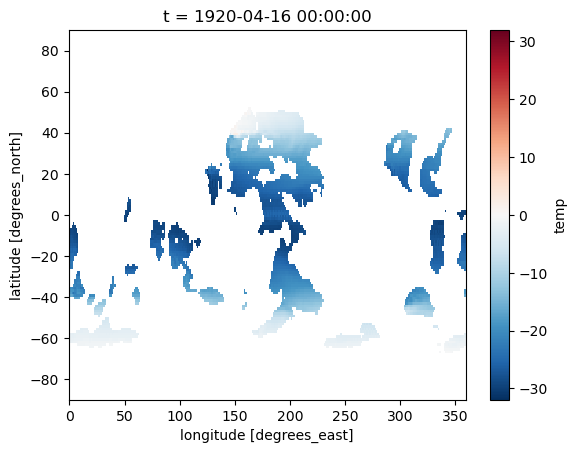

In [25]:
delta_temp.plot()

10. Let's compute and visualize the *average* temperature of the ocean surface. Slice out the temperature from 100 meters deep to the bottom. Apply the mean aggregation method and plot the result.

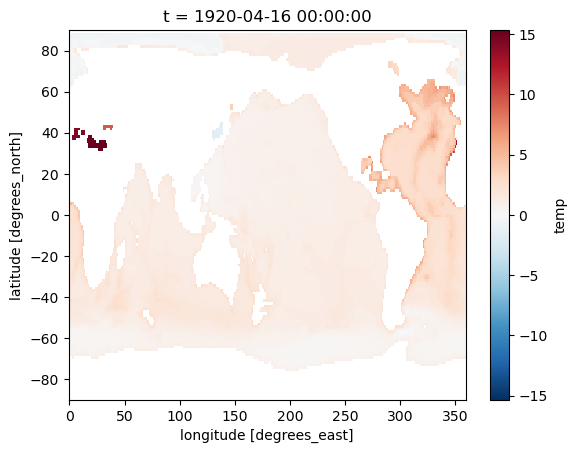

In [26]:
surface = temperature.sel(depth=slice(1000, 50000))
surface.mean(dim='depth', skipna=True ).plot()

11. Using a similar method, calculate the **minimum** temperature across the water depth in all locations.

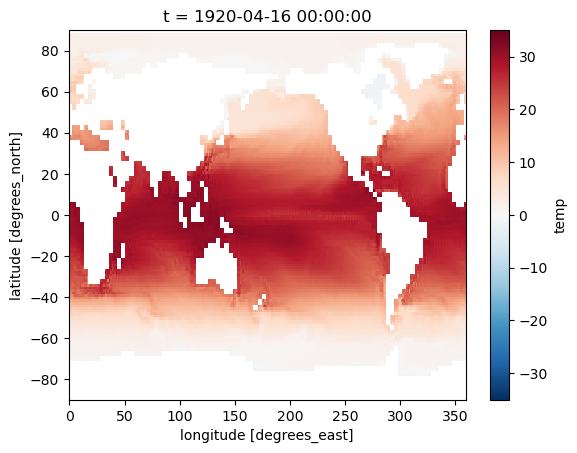

In [27]:
temperature.max(dim='depth').plot()

## 3. Extension Questions ##

13. Write code to compute the global average ocean temperature change (averaged over all depths) for the entire time period in the dataset. Then display the result as a 2D depth profile.

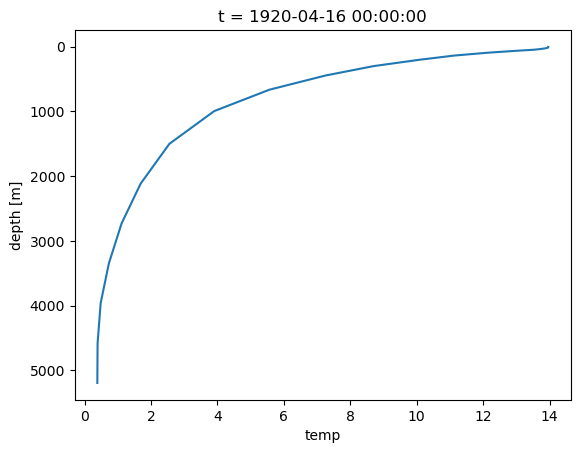

In [29]:
global_avg_temp = temperature.mean(dim=['latitude', 'longitude'])
global_avg_temp.plot(y='depth')
plt.gca().invert_yaxis()

14. Calculate the zonal average temperature change for each latitude. Plot the result as a 2d contour with depth on the y axis and latitude on x.

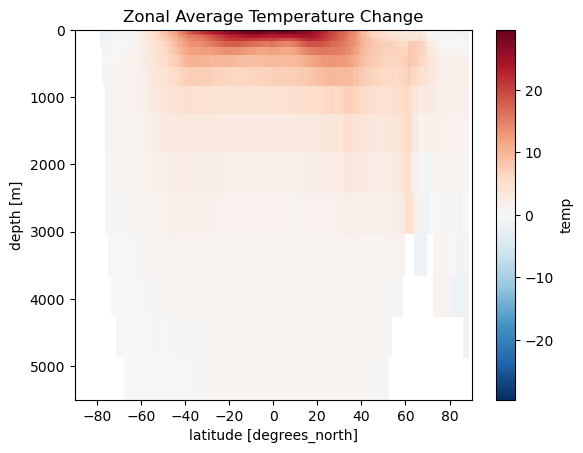

In [32]:
zonal_avg_temp = temperature.mean(dim=['longitude'])
zonal_avg_temp.plot()
plt.title('Zonal Average Temperature Change')
plt.gca().invert_yaxis()